In [ ]:
import numpy as np
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
# Generate random data
x = np.linspace(10, 15, 200)
y_true = 3 * np.sin(x) + np.log(x - 4) - np.cos(3 * x)

# Add noise
y = y_true + np.random.normal(0, 1, len(x))

# binary classification based on threshold function
threshold = 3 * np.cos(2 * x)
y_class = (y > threshold).astype(int)

x = x.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size=0.1, random_state=34, shuffle=True)

Accuracy: 0.75


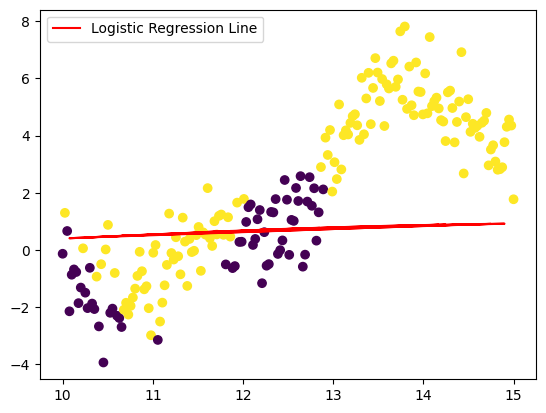

In [ ]:
# Create the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions
y_probs = model.predict_proba(x_test)[:, 1]
predictions = (y_probs >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# plot Logistic Regression Line
plt.scatter(x, y, c=y_class, cmap='viridis')
plt.plot(x_test, y_probs, color='red', label='Logistic Regression Line')
plt.legend()
plt.show()

In [ ]:
# parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [10, 1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Train SVM
svm_test_model = svm.SVC()
grid_search = GridSearchCV(estimator=svm_test_model, param_grid=param_grid, cv=10, scoring='accuracy', verbose=0)
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Test the best model on the test data
best_model = grid_search.best_estimator_

print("Test Accuracy:", best_model.score(x_test, y_test), "\n")

print(best_model)

Best Parameters: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9277777777777778
Test Accuracy: 0.9 

SVC(C=1000, gamma=0.1)


Accuracy: 0.9


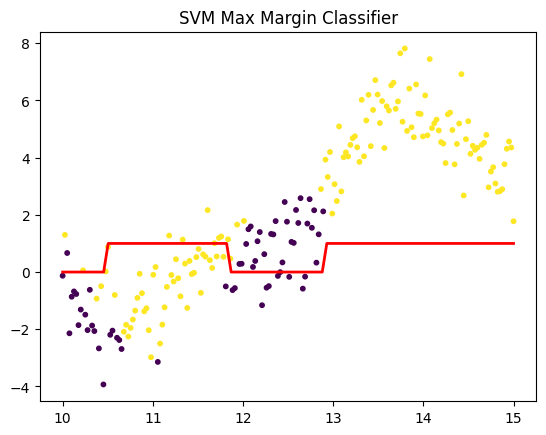

In [ ]:
# train SVM
svm_model = svm.SVC(C=1000, kernel='rbf', gamma=0.1, decision_function_shape='ovr')
svm_model.fit(x_train, y_train)

# Create a grid to plot the decision boundary
xx = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

# Predict on the grid
z = svm_model.predict(xx)

# Calculate accuracy
svm_prediction = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, svm_prediction)
print(f"Accuracy: {accuracy}")

# Plot the results
plt.scatter(x, y, c=y_class, cmap='viridis', s=10)
plt.plot(xx, z, color='red', lw=2)
plt.title('SVM Max Margin Classifier')
plt.show()

In [ ]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

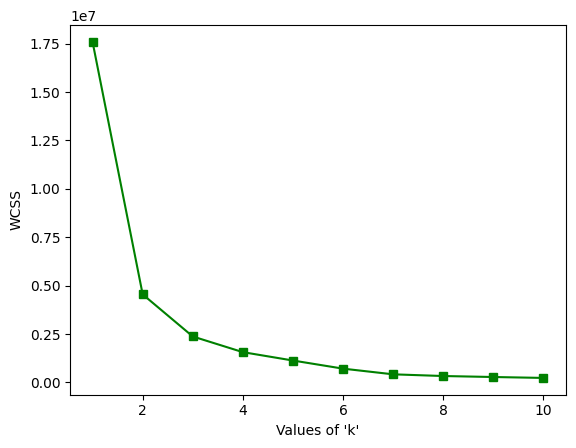

In [ ]:
# Load the Wine dataset
wine_data = load_wine()
x = wine_data.data

# elbow plot
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(x)
    wcss[i] = kmeans.inertia_

plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

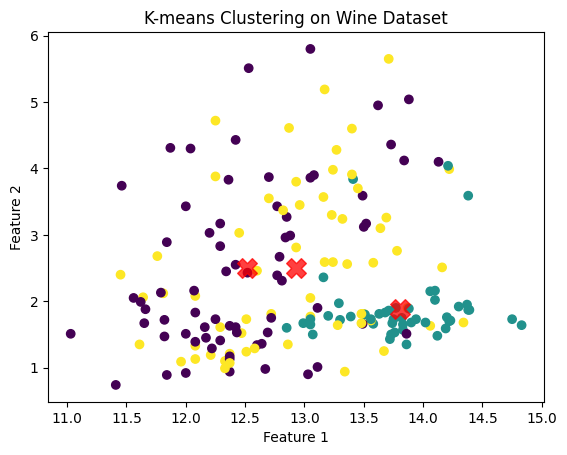

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(x)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot clusters (using first two features)
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering on Wine Dataset')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)  # For 2D visualization
x_pca = pca.fit_transform(x)

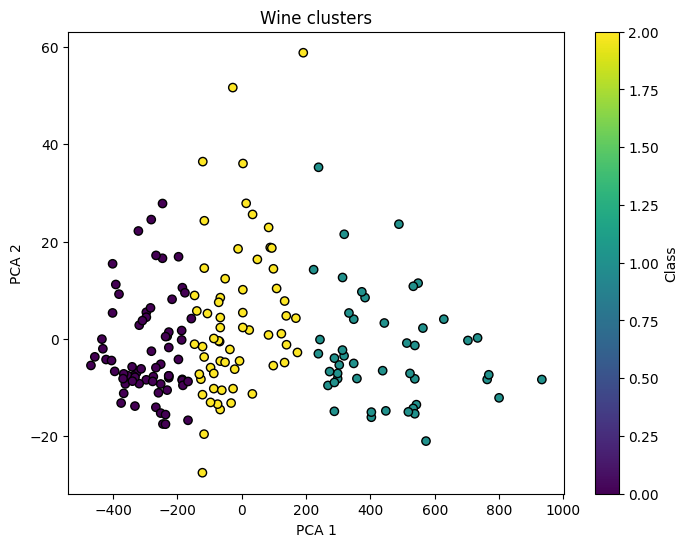

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Wine clusters')
plt.colorbar(label='Class')
plt.show()

In [ ]:
!pip install kmodes

In [ ]:
from sklearn.datasets import fetch_openml
from kmodes.kmodes import KModes

In [ ]:
# Load dataset
adult_data = fetch_openml(name='adult', version=2)
x1 = adult_data.data
x1 = x1.dropna()  # Drop rows with missing values

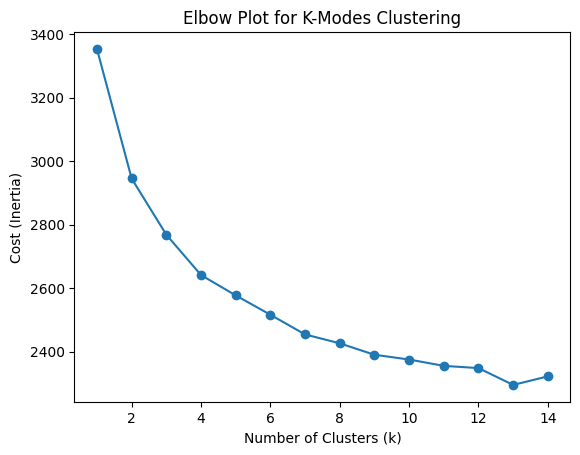

In [ ]:
subset = x1.sample(n=500, random_state=2) #take 500 samples from the dataset, becasue dataset is big

costs = []
for k in range(1, 15):  # Test k from 1 to 15 clusters
    kmode = KModes(n_clusters=k, init='Huang', n_init=10, verbose=0)
    kmode.fit(subset)
    costs.append(kmode.cost_)

plt.plot(range(1, 15), costs, marker='o')
plt.title('Elbow Plot for K-Modes Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.show()

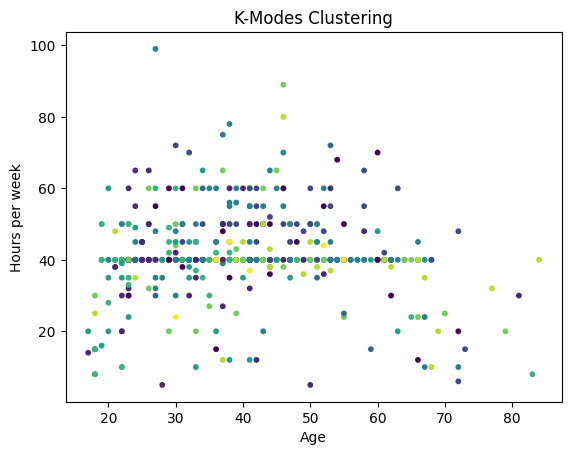

In [ ]:
# Apply K-Modes clustering with k=10, seems to be a good value for k
km = KModes(n_clusters=10, init='Huang', n_init=10, verbose=0)
y_km = km.fit_predict(subset)

# Plot the results
plt.scatter(subset['age'], subset['hours-per-week'], c=y_km, cmap='viridis', s=10)
plt.title("K-Modes Clustering")
plt.xlabel("Age")
plt.ylabel("Hours per week")
plt.show()

In [27]:
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D

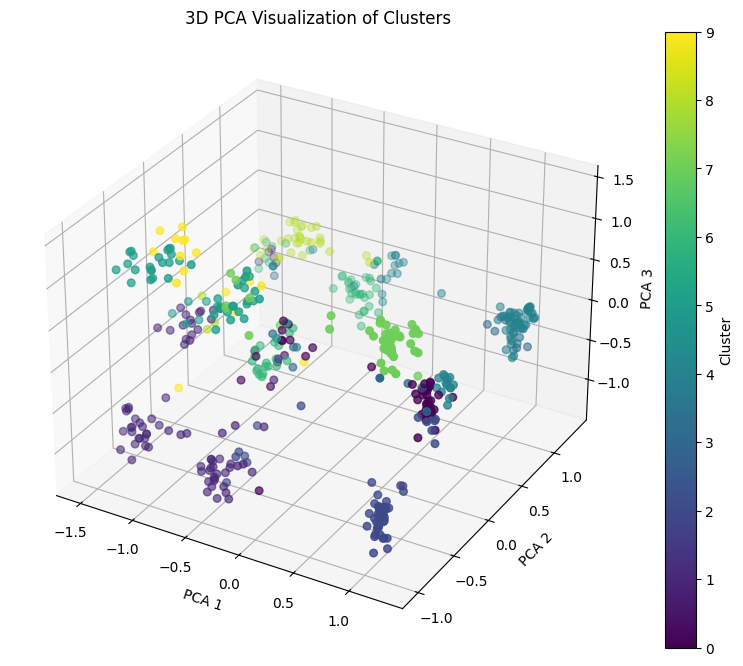

In [30]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(subset)

pca = PCA(n_components=3)
pca_data = pca.fit_transform(encoded_data.toarray())

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=y_km, cmap='viridis', s=30)

# Add labels and legend
ax.set_title("3D PCA Visualization of Clusters")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
fig.colorbar(scatter, ax=ax, label="Cluster")

plt.show()